# Case 2. 
Matias Olkkonen<br>
Last edited: 25.02.2018<br>
Cognitive Systems for Health Technology Applications<br>


## 1. Import libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
%matplotlib inline

## Building network

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [47]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

In [48]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "dataset2\\train"
validation_dir = "dataset2\\validation"
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1237 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [49]:
# Testing testing testing
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


In [51]:
labels_batch

array([ 0.,  1.,  0.,  0.,  0.], dtype=float32)

In [52]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      verbose = 1,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
5/5 [==============================] - 98s 20s/step - loss: 0.5435 - acc: 0.6400 - val_loss: 0.5623 - val_acc: 0.7200
Epoch 2/5
5/5 [==============================] - 98s 20s/step - loss: 0.7957 - acc: 0.6000 - val_loss: 0.5854 - val_acc: 0.7200
Epoch 3/5
5/5 [==============================] - 93s 19s/step - loss: 0.5763 - acc: 0.7600 - val_loss: 0.5615 - val_acc: 0.7200
Epoch 4/5
5/5 [==============================] - 103s 21s/step - loss: 0.5282 - acc: 0.7200 - val_loss: 0.5567 - val_acc: 0.7200
Epoch 5/5
5/5 [==============================] - 133s 27s/step - loss: 0.4831 - acc: 0.8400 - val_loss: 0.5554 - val_acc: 0.7200


In [53]:
#First test with very few epoch and small batch sizes
model.save('case_2_run_1.h5')

## Results

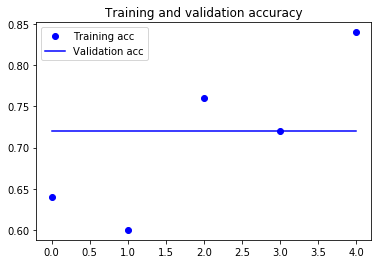

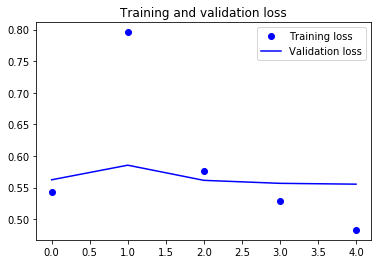

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()